In [6]:
import pandas as pd
df=pd.read_csv('./train.csv')
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [7]:
df.head()
df=df.dropna()
df.reset_index(inplace=True)

In [8]:
X=df.drop('label',axis=1)
y=df['label']

In [9]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(X)):
    review = re.sub('[^a-zA-Z]', ' ', X['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [5]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [17]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [44]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


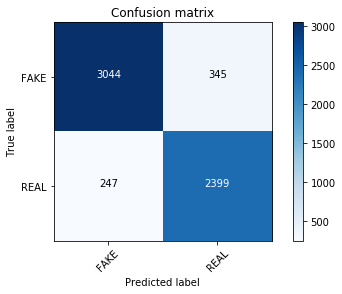

In [48]:
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [21]:
#MultinomialNB Algorithm

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)


accuracy:   0.902


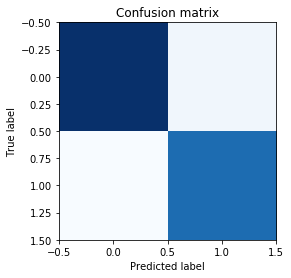

In [28]:
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [49]:
import re
re.sub('[/(){}\[\]\|@,;]','','pan[] how are you')

'pan how are you'

In [10]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline


In [69]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


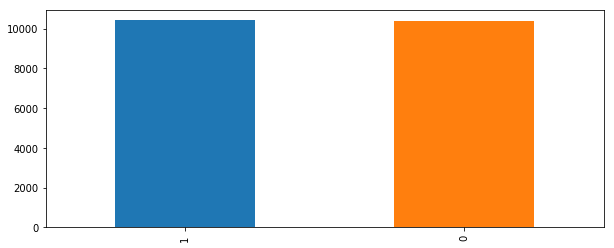

In [70]:
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

In [59]:
#Text Pre-processing

AttributeError: 'float' object has no attribute 'lower'

In [74]:
df['text']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
5        In these trying times, Jackie Mason is the Voi...
6        Ever wonder how Britain’s most iconic pop pian...
7        PARIS  —   France chose an idealistic, traditi...
8        Donald J. Trump is scheduled to make a highly ...
9        A week before Michael T. Flynn resigned as nat...
10       Organizing for Action, the activist group that...
11       The BBC produced spoof on the “Real Housewives...
12       The mystery surrounding The Third Reich and Na...
13       Clinton Campaign Demands FBI Affirm Trump's Ru...
14       Yes, There Are Paid Government Trolls On Socia...
15       Guillermo Barros Schelotto was not the first A...
16       The scandal engulfing Wells Fargo toppled its .

In [102]:
sum([len(sent.split(' ')) for sent in corpus])

159604

In [7]:
from sklearn.model_selection import train_test_split
X=corpus
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [8]:
#Naive Bayes Classifier for Multinomial Models

X

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer(max_features=5000,ngram_range=(1,3))),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=['Fake','Not Fake']))

accuracy 0.8736784542471746
              precision    recall  f1-score   support

        Fake       0.85      0.94      0.89      3107
    Not Fake       0.91      0.78      0.84      2379

   micro avg       0.87      0.87      0.87      5486
   macro avg       0.88      0.86      0.87      5486
weighted avg       0.88      0.87      0.87      5486



In [12]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer(max_features=5000,ngram_range=(1,3))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=['Fake','Not Fake']))

accuracy 0.8959168793292016
              precision    recall  f1-score   support

        Fake       1.00      0.82      0.90      3107
    Not Fake       0.81      1.00      0.89      2379

   micro avg       0.90      0.90      0.90      5486
   macro avg       0.90      0.91      0.90      5486
weighted avg       0.92      0.90      0.90      5486



/Users/pankaj/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [13]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=['Fake','Not Fake']))

accuracy 0.916514764855997
              precision    recall  f1-score   support

        Fake       0.94      0.91      0.92      3107
    Not Fake       0.88      0.93      0.91      2379

   micro avg       0.92      0.92      0.92      5486
   macro avg       0.91      0.92      0.92      5486
weighted avg       0.92      0.92      0.92      5486



/Users/pankaj/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [128]:
#Word2vec

In [14]:
sentences=[]
for i in range(len(corpus)):
    sentences.append([word for word in corpus[i].split(' ') if word not in stopwords.words('english')])
    


In [17]:
# Training the Word2Vec model
from gensim.models import Word2Vec
model = Word2Vec(sentences, min_count=1)

In [144]:
model.wv['hous']

array([ 6.90674245e-01, -3.57828021e-01, -9.02100384e-01,  2.27688253e-01,
        4.87090908e-02, -1.98716700e-01, -1.04827952e+00, -2.44286552e-01,
       -5.20726204e-01, -5.10500431e-01, -4.60802823e-01, -6.27924502e-02,
        1.00368881e+00,  4.71670032e-01, -7.04943180e-01,  1.33709684e-01,
        4.05365914e-01, -7.25816786e-01, -5.16035795e-01, -1.17745030e+00,
       -6.11732304e-01,  5.64144075e-01,  2.75841326e-01,  2.70927936e-01,
       -1.05030559e-01, -7.95494616e-01,  5.80868542e-01,  1.65081888e-01,
       -2.09228933e-01,  4.15847093e-01, -1.21811175e+00, -3.09540592e-02,
       -1.57952875e-01,  7.57145584e-02,  8.58791769e-01, -1.57516181e-01,
       -8.95962536e-01, -9.45591629e-02,  7.84449220e-01, -9.97808017e-03,
       -5.40195048e-01, -2.83285558e-01,  8.67187619e-01,  5.08940101e-01,
        8.59833062e-01,  1.14295036e-01,  8.23702693e-01, -2.65178174e-01,
        6.24473132e-02, -6.00539632e-02,  1.78501070e-01, -6.44283772e-01,
        2.49728963e-01,  

In [152]:
from itertools import islice
list(islice(model.wv.vocab, 13030, 13050))

['exposur',
 'misophonia',
 'tilt',
 'iwo',
 'jima',
 'minc',
 'sheer',
 'badasseri',
 'shenanigan',
 'drummer',
 'nero',
 'pyrophobia',
 'bpa',
 'rapino',
 'animu',
 'chakra',
 'gummi',
 'peacenik',
 'collag',
 'corrut']

In [74]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(model.wv.vectors_norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [39]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(corpus, test_size=0.3, random_state = 42)

test_tokenized = [w2v_tokenize_text(sent) for sent in test]
train_tokenized = [w2v_tokenize_text(sent) for sent in train]


In [76]:
model.init_sims()

In [89]:
X_train_word_average = word_averaging_list(model.wv,train_tokenized)
X_test_word_average = word_averaging_list(model.wv,test_tokenized)

In [92]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, y_train)
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=['Fake','Real']))

/Users/pankaj/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy 0.7530076558512577
              precision    recall  f1-score   support

        Fake       0.80      0.75      0.77      3107
        Real       0.70      0.76      0.73      2379

   micro avg       0.75      0.75      0.75      5486
   macro avg       0.75      0.75      0.75      5486
weighted avg       0.76      0.75      0.75      5486



In [73]:
model.wv.vectors_norm

array([[ 0.05590918, -0.04971954,  0.05057123, ...,  0.16271211,
         0.18832465, -0.07138146],
       [ 0.04442605, -0.07312229,  0.06501926, ...,  0.097065  ,
         0.17791265, -0.04953543],
       [ 0.03115136, -0.02675522,  0.0452263 , ...,  0.11345313,
         0.21021646, -0.07998848],
       ...,
       [-0.0114306 ,  0.0430645 , -0.00988551, ...,  0.0847311 ,
         0.0813067 , -0.16525908],
       [ 0.13500592, -0.0623509 ,  0.00443565, ...,  0.19171399,
         0.20009226, -0.17416306],
       [ 0.18644522,  0.05238727,  0.1337702 , ...,  0.07449352,
         0.1127172 , -0.11639185]], dtype=float32)

In [87]:
sum([1 if len(sen)==1 else 0 for sen in train_tokenized])

42

In [10]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(df) * .7)
train_posts = corpus[:train_size]
train_tags = y[:train_size]

test_posts = corpus[train_size:]
test_tags = y[train_size:]

max_words = 1000

tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)



In [11]:
tokenize.texts_to_matrix(train_posts).shape

(12799, 1000)

In [12]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)


1.0

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

batch_size = 32
epochs = 4

# Build the model
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 11519 samples, validate on 1280 samples
Epoch 1/4
11519/11519 [==============================] - 10s 893us/step - loss: 0.2504 - accuracy: 0.8915 - val_loss: 0.2159 - val_accuracy: 0.9102
Epoch 2/4
11519/11519 [==============================] - 9s 804us/step - loss: 0.1526 - accuracy: 0.9410 - val_loss: 0.2271 - val_accuracy: 0.9141
Epoch 3/4
11519/11519 [==============================] - 10s 840us/step - loss: 0.1127 - accuracy: 0.9587 - val_loss: 0.2431 - val_accuracy: 0.9102
Epoch 4/4
11519/11519 [==============================] - 9s 806us/step - loss: 0.0839 - accuracy: 0.9703 - val_loss: 0.2997 - val_accuracy: 0.9062


In [18]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

5486/5486 [==============================] - 1s 130us/step
Test accuracy: 0.9238060712814331


In [19]:
#Doc2vec and Logistic Regression

In [25]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re
from sklearn.model_selection import train_test_split

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled

X_train, X_test, y_train, y_test = train_test_split(corpus, y, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [27]:
X_train[0]

TaggedDocument(words=['donald', 'trump', 'keep', 'distanc', 'g', 'p', 'platform', 'fight', 'gay', 'right', 'new', 'york', 'time'], tags=['Train_0'])

In [51]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(40):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha


100%|██████████| 18285/18285 [00:00<00:00, 2139568.94it/s]


In [52]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=['FAKE','REAL']))

/Users/pankaj/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pankaj/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy 0.8570907765220561
              precision    recall  f1-score   support

        FAKE       0.87      0.88      0.87      3084
        REAL       0.84      0.83      0.84      2402

   micro avg       0.86      0.86      0.86      5486
   macro avg       0.86      0.85      0.85      5486
weighted avg       0.86      0.86      0.86      5486

